<a href="https://colab.research.google.com/github/KauYuTing666/ML100Days/blob/master/D10/Day_010_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 範例 : (Kaggle)房價預測
***
- 以下用房價預測資料, 觀察去除離群值的影響

# [教學目標]
- 以下用房價預測資料, 觀察去除離群值的影響

# [範例重點]
- 觀察原始數值的散佈圖, 以及線性迴歸分數 (In[5], Out[5])
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[6], Out[6])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[7], Out[7])

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import os
os.chdir('/content/drive/MyDrive/機器學習百日馬拉松/D10_數值型特徵/範例檔案')

In [32]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # 歸一化
from sklearn.model_selection import cross_val_score # 交叉驗證評估模型表現
from sklearn.linear_model import LinearRegression # 線性回歸

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [33]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [34]:
## 過濾出所有數值型欄位
df = df[num_features]
df = df.fillna(-1) # 將缺失值填為-1
MMEncoder = MinMaxScaler() # 歸一化
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64


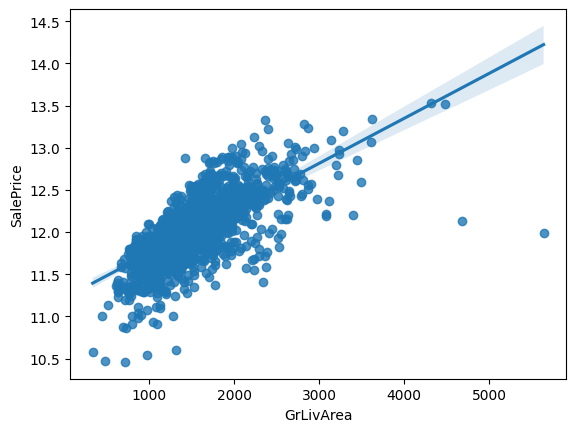

In [35]:
# 顯示 GrLivArea 與目標值的散佈圖
## GrLivArea: Above grade (ground) living area square feet
## sns.regplot: https://seaborn.pydata.org/generated/seaborn.regplot.html
## https://www.cnblogs.com/cgmcoding/p/13293395.html
import seaborn as sns
import matplotlib.pyplot as plt
print(df['GrLivArea'])
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show();

In [36]:
# 做線性迴歸, 觀察分數
## 做Min-Max Scaler 處理
# print(df)
train_X = MMEncoder.fit_transform(df) # 歸一化
# print(train_X)
estimator = LinearRegression()
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
cross_val_score(estimator, train_X, train_Y, cv=5).mean() # 將數據切為5組訓練集和驗證集，測試每組準確度後平均

0.8466400643386504

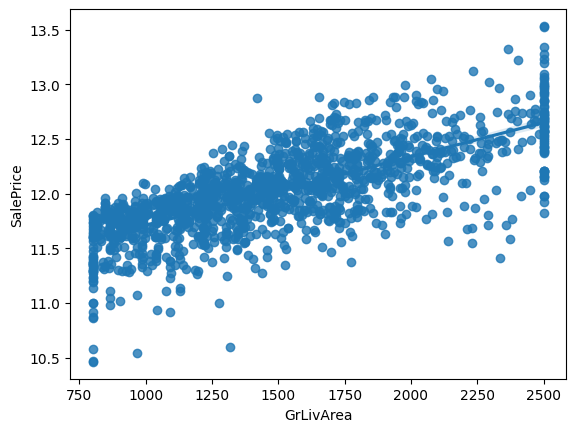

0.8590286613713278

In [37]:
# 將 GrLivArea 限制在 800 到 2500 以內, 調整離群值
## .clip: 大於或小於閾值的值，以閾值取代
df['GrLivArea'] = df['GrLivArea'].clip(800, 2500) # 調整離群值，<800設為800，>2500設為2500
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()
# 去除離群值後

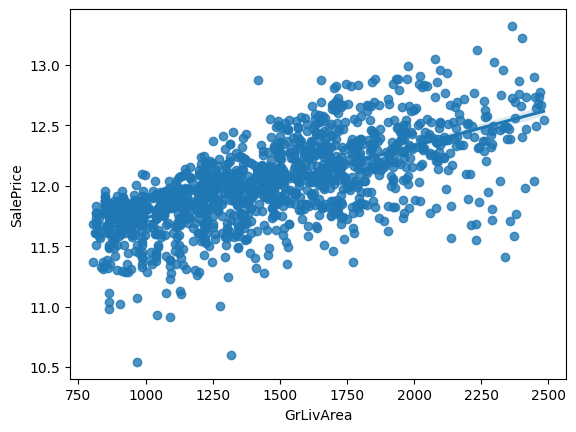

0.8765034252172894

In [41]:
# 將 GrLivArea 限制在 800 到 2500 以內, 捨棄離群值
keep_indexs = (df['GrLivArea']> 800) & (df['GrLivArea']< 2500) # mask
df = df[keep_indexs]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

重點:
比較3種情況:
1. 無調整
2. 調整outlier
3. 刪除outlier

觀察散點圖、比較模型評估分數

# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。